Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, завдання буде оцінена максимум у половину балів.

Під час виконання вам дозволено користуватися будь-якими зручними для вас Python бібліотеками для візуалізації.

# I. Receiving Data.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. (2б) Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою titanic ([train.csv](https://www.kaggle.com/c/titanic/data?select=train.csv)). Зчитайте його та збережіть його у змінну, щоб у подальшому її використати для візуалізацій. Виведіть інформацію про кожну колонку, її індекс, тип та кількість непропущених значень та перші кілька рядків датафрейму.


In [3]:
data_path = '/content/drive/MyDrive/Python_for_big_data/train.csv'
titanic_df = pd.read_csv(data_path, sep=',', na_values='?')
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
print(titanic_df.info())
print(titanic_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                      

# IІ. Data Visualization.

2. (10б) Створіть pie chart, який би показував співвідношення виживших до загиблих.

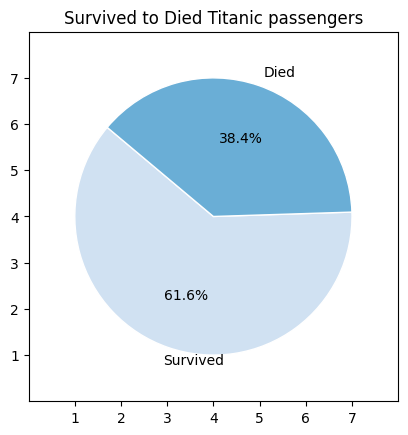

In [5]:
# extract data from Dataframe
survival_counts = titanic_df['Survived'].value_counts()

# prepare pie chart labels and colors
title = 'Survived to Died Titanic passengers'
labels = ['Survived', 'Died']
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.5, len(survival_counts)))

# plot chart
fig1, ax1 = plt.subplots()
ax1.pie(survival_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, radius=3, center=(4, 4),
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=True)

ax1.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

ax1.set_title(title)
plt.show()

*прокоментуйте отримані візуалізації

Тут необхідно продемонструвати пропорцію категорій (загиблий чи той, що вижив), які є частинами цілої вибірки. Кругова діаграма чудово підходять для того, щоб швидко просканувати та зрозуміти суть співвідношення. Pie chart дозволяє легко порівнювати розмір сегментів між собою, що може допомогти виділити найбільші або найменші категорії в наборі даних.

Короткий заголовок допомагає зрозуміти, які саме дані зображаються графіком. Відсоткове співвідношення деталізує
Кольори, що обрані для сегментів не заплутують і не перевантажують графік.

З побудованого pie chart, ми бачимо, що 61,6% пасажирів Титаніка вижили, а 38,4% загинули в катастрофі.

3. (20б) Створіть bar chart, який би показував співвідношення загиблих до виживших для кожної статі. Для groupby використовуйте атрибут as_index=False.


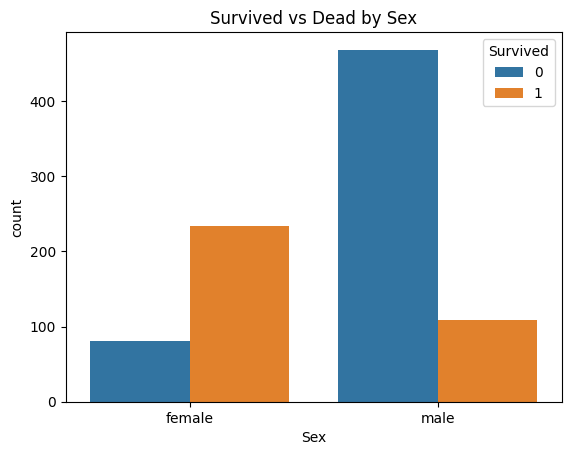

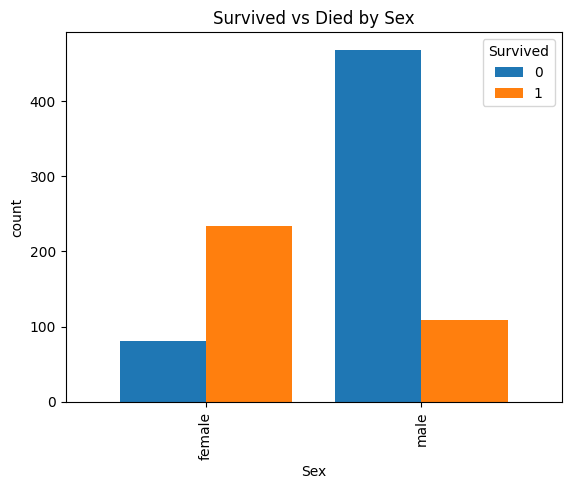

In [6]:
survival_counts_by_sex = titanic_df.groupby('Sex')['Survived'].value_counts().unstack()

title = 'Survived vs Died by Sex'
ylabel = 'count'
bar_width = 0.8
group_spacing = 0.2

survival_counts_by_sex.plot(kind='bar', width=bar_width)
plt.title(title)
plt.ylabel(ylabel)

plt.show()

*прокоментуйте отримані візуалізації

Побудована візуалізація складається з двох стовпчиків, що репрезентують кількість пасажирів, що загинули та вижили за статтю. Кольорова схема відповідає значенню параметра Survived для обох статей, що робить візуалізацію легкою для сприйняття та однозначною. Кольори також достатньо контрастні для того, щоб явно бачити між ними різницю. Масштаби стовпчиків дозволяють легко побачити велику різницю в співвідношеннях пасажирів, що вижили та загинули. На стовпчиках немає міток з конкретним значенням кількості пасажирів, що може бути доречним для певних цілей побудови графіка.

З побудованого bar chart, ми бачимо, що серед жінок чисельність, тих що вижили, більше, ніж вдвічі переважає чисельність загиблих. Для чоловіків ситуація різко протилежна - загиблих було більше, ніж учетверо більше, ніж тих, що вижили.

4. (20б) Відобразіть кількість пропущених значень в датасеті по кожній із змінних.

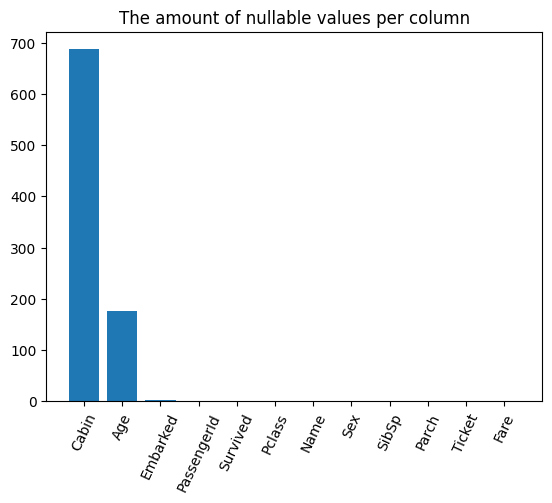

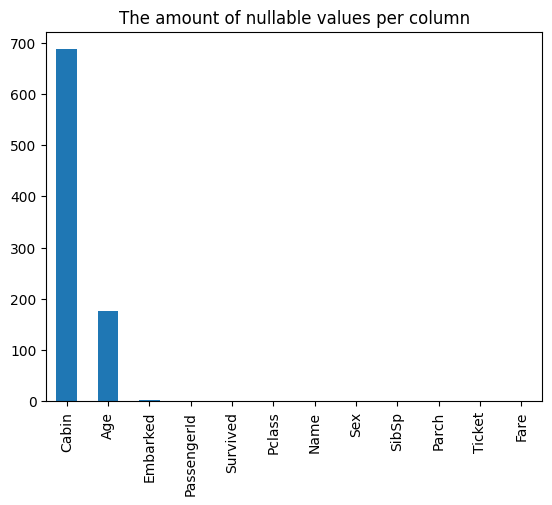

In [7]:
missing_values_counts = titanic_df.isna().sum().sort_values(ascending=False)

title = 'The amount of nullable values per column'
bar_width = 0.5

missing_values_counts.plot(kind='bar', width=bar_width)
plt.title(title)

plt.show()

*прокоментуйте отримані візуалізації

Побудована візуалізація складається зі стовпчиків для кожної колонки, що показують кількість пропущених значень у колонках.
Відстань між стовпчиками та підписами дозволяє легко побачити межі кожного елемента та розпізнати ключову інформацію.
На стовпчиках немає міток з конкретним значенням кількості пропущених значень, що може бути доречним для певних цілей побудови графіка. Колонки відсортовані за ключовим показником, що дозволяє легко зробити висновок про співвідношення між показником для різних колонок.

З побудованого bar chart, ми бачимо, що найбільше пропущених значень присутнє в колонці Cabin, далі з відривом більшим, ніж у три рази йде колонка Age, і остання з зовсім незначним показником Embarked. Інші колонки не містять пропущених значень.

5. (10б) Побудуйте наступний графік, дайте йому назву та опишіть, що власне на них відображається.

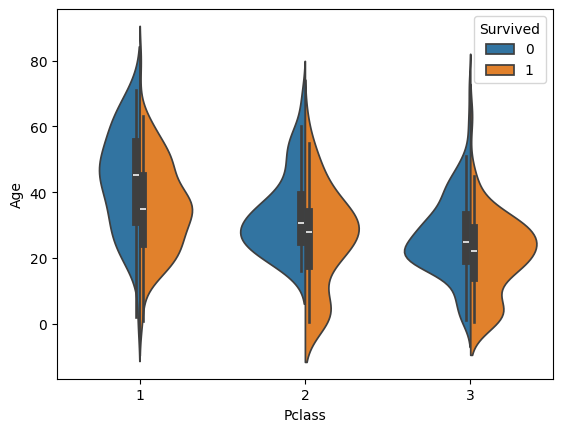

Text(0.5, 1.0, 'Survived vs Died passengers by Age and Ticket class')

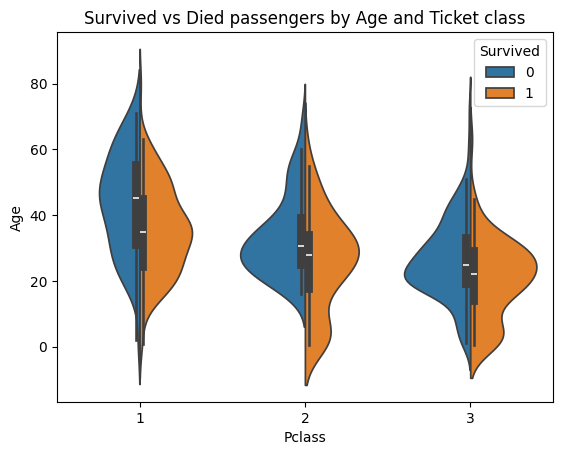

In [8]:
chart = sns.violinplot(data=titanic_df, x="Pclass", y="Age", hue="Survived", split=True)
chart.set_title('Survived vs Died passengers by Age and Ticket class')

*прокоментуйте отримані візуалізації

На цьому графіку відображається розподіл пасажирів Титаніка, що вижили та загинули залежно від віку та класу квитка. Візуально досить важко швидко виокремити висновки з візуалізації, окрім того, що найбільше загиблих були молодими людьми з другого та третього класу, а також пасажири першого класу у віці 40-60 років. Що ж до тих, що вижили, однозначний висновок можна надати лише про дітей, чисельність яких була значною в другому та третьому класі квитків.

6. (13б) Побудуйте графік розподілу частот по віку пасажирів.


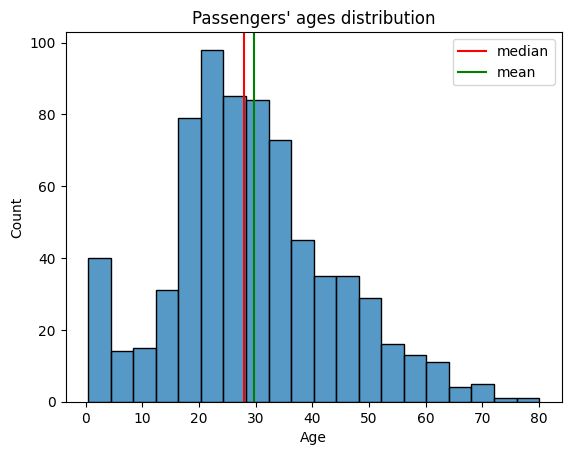

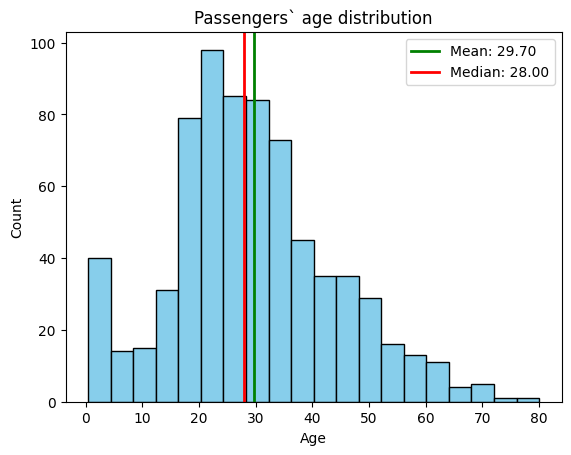

In [9]:
passengers_by_age = titanic_df['Age']

title = 'Passengers` age distribution'

plt.hist(passengers_by_age, bins=20, color='skyblue', edgecolor='black')

mean_age = passengers_by_age.mean()
median_age = passengers_by_age.median()

plt.axvline(mean_age, color='green', linewidth=2, label=f'Mean: {mean_age:.2f}')
plt.axvline(median_age, color='red', linewidth=2, label=f'Median: {median_age:.2f}')

plt.title(title)
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()

plt.show()

*прокоментуйте отримані візуалізації

Побудована гістограма розподілу віку пасажирів. Цей вид графіку чудово підходить для візуалізації частоти даних в межах різних інтервалів віку. Кожен стовпчик представляє діапазон віку. Чим вищий прямокутник, тим більше людей в цій віковій групі.

На графіку представлені дві вертикальні лінії, які позначають середнє (зелена лінія) та медіанне (червона лінія) значення віку пасажирів. Це корисно для статистичної оцінки розподілу віку - медіана показує вік.

З цього графіка можна побачити, що більшість пасажирів у віковому діапазоні від 20 до 40 років. Також серед пасажирів було багато дітей у віці до 6-7 років. Середній вік пасажирів знаходиться дещо правіше від медіани.

7. (25б) Поставте бізнес-питання до даних. Дайте на нього відповідь за допомогою візуалізацій. Прокоментуйте отриману відповідь.

*питання до даних

Бізнес-запитання:
1. Чи існує зв'язок між кількістю членів сім'ї на борту (брати, сестри, дружини, чоловіки, діти) та шансами виживання в катастрофі?
  За допомогою сервісу https://datavizcatalogue.com/search/relationships.html
було визначено, що для демонстрації зв'язку між змінними можна використати такий графік як heatmap.

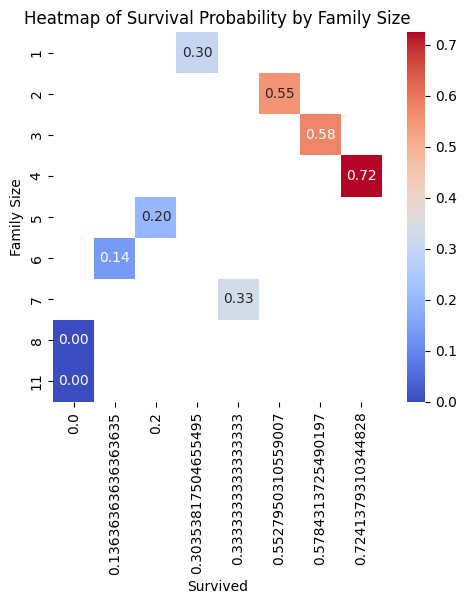

In [25]:
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1
family_survival = titanic_df.groupby('FamilySize')['Survived'].mean().reset_index()

survival_matrix = family_survival.pivot(index='FamilySize', columns='Survived', values='Survived')

sns.heatmap(survival_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)

plt.title('Heatmap of Survival Probability by Family Size')
plt.ylabel('Family Size')
plt.show()

*прокоментуйте отримані візуалізації

З теплової карти бачимо, що пасажири, які подорожували з сім'єю по 2, 3 і 4 людини мали значно вищі шанси вижити (55%, 58% і 72% людей вижили відповідно). Натомість з пасажирів, що подорожували без родини, вижило лише 30№. Люди, що мали родини більше, ніж 4 особи мали загалом ще нижчий показник виживання в катастрофі (менше 30№).

Теплова карта дає компактний та інтуїтивно зрозумілий інструмент для подання співвідношень та зв'язків між категоріями.

# Вітаю! Ви велика(ий) молодець, що впоралась(вся). Похваліть себе та побалуйте чимось приємним. Я Вами пишаюся.

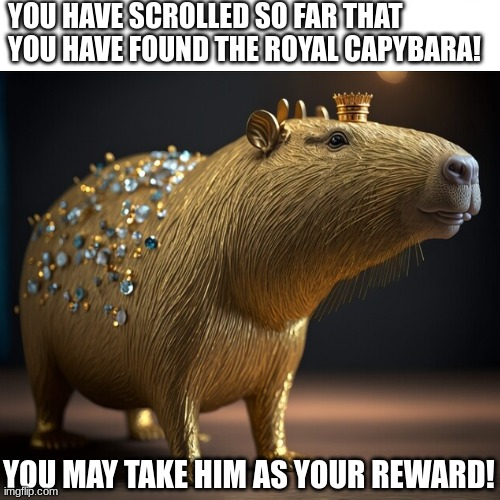